# Imports

In [14]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.gen_functions import *
from src.data.weather_data import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.features.landuse import *
from src.visualization.vis_data import *
from src.visualization.vis_model import show_fea_imp
from src.visualization.mapper import *
from src.data.fire_data import cal_repeat_spots_ex_year, cal_repeat_spots


# for model interpretation
from treeinterpreter import treeinterpreter as ti
from src.models.predict_model import * 

import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Search for the weather station in the database.

In [6]:
# starting from init the map object
mapper = Mapper()
mapper.load_()

# add map setting to add center of the map
mapper.set_map_params(center_city='Bangkok')
mapper.build_station_info()

number of stations = (2753, 30)
Countries ['Thailand' nan 'India' 'China' 'Indonesia' 'Malaysia' 'Bangladesh'
 'Vietnam' 'Myanmar' 'Brunei Darussalam' 'Cambodia' 'Bhutan' 'Laos']


In [15]:
# starting from init the map object
mapper = Mapper()
mapper.load_()

In [16]:
mapper.all_station_info.head()

,id,nameTH,nameEN,areaTH,areaEN,stationType,Latitude,Longitude,forecast,LastUpdate,...,Region,Region (ASCII),Population,Time Zone,Max Latitude,Max Longitude,Min Latitude,Min Longitude,long_km,lat_km
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,[],"{'date': '2022-03-11', 'time': '16:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,[],"{'date': '2022-03-11', 'time': '16:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05t,กรมอุตุนิยมวิทยาบางนา,Thai Meteorological Department,"แขวงบางนา เขตบางนา, กรุงเทพฯ","Bang Na, Khet Bang Na, Bangkok",GROUND,13.666183,100.605742,[],"{'date': '2022-03-11', 'time': '16:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10t,เคหะชุมชนคลองจั่น,National Housing Authority Klongchan,"แขวงคลองจั่น เขตบางกะปิ, กรุงเทพฯ","Khlong Chan, Khet Bang Kapi, Bangkok",GROUND,13.779873,100.646009,[],"{'date': '2022-03-11', 'time': '16:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.775530,100.569195,[],"{'date': '2022-03-11', 'time': '16:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mapper.all_station_info.columns

Index(['id', 'nameTH', 'nameEN', 'areaTH', 'areaEN', 'stationType', 'Latitude',
       'Longitude', 'forecast', 'LastUpdate', 'long_m', 'lat_m', 'Country',
       'City', 'source', 'dustboy_uri', 'dustboy_name_th', 'dustboy_name_en',
       'dustboy_version', 'City (ASCII)', 'Region', 'Region (ASCII)',
       'Population', 'Time Zone', 'Max Latitude', 'Max Longitude',
       'Min Latitude', 'Min Longitude', 'long_km', 'lat_km'],
      dtype='object')

In [19]:
mapper.all_station_info['source'].unique()

array(['TH_PCD', 'TH_BKP', 'TH_CMU', 'Berkeley', 'US_emb'], dtype=object)

In [20]:
mapper.all_station_info[mapper.all_station_info['source'] == 'Berkeley'].head()

,id,nameTH,nameEN,areaTH,areaEN,stationType,Latitude,Longitude,forecast,LastUpdate,...,Region,Region (ASCII),Population,Time Zone,Max Latitude,Max Longitude,Min Latitude,Min Longitude,long_km,lat_km
579,berk0,NaN,NaN,NaN,NaN,NaN,30.1445,74.1955,NaN,NaN,...,Punjab,Punjab,130603.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
580,berk1,NaN,NaN,NaN,NaN,NaN,24.4801,72.7819,NaN,NaN,...,Rajasthan,Rajasthan,50262.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
581,berk2,NaN,NaN,NaN,NaN,NaN,21.2567,77.5101,NaN,NaN,...,Maharashtra,Maharashtra,111278.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
582,berk3,NaN,NaN,NaN,NaN,NaN,45.5455,126.9770,NaN,NaN,...,Heilongjiang,Heilongjiang,144665.0,Asia/Shanghai,NaN,NaN,NaN,NaN,NaN,NaN
583,berk4,NaN,NaN,NaN,NaN,NaN,19.6720,78.5359,NaN,NaN,...,Telangana,Telangana,118526.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mapper.all_station_info['Country'].unique()

array(['Thailand', nan, 'India', 'China', 'Indonesia', 'Malaysia',
       'Bangladesh', 'Vietnam', 'Myanmar', 'Brunei Darussalam',
       'Cambodia', 'Bhutan', 'Laos'], dtype=object)

In [23]:
mapper.all_station_info[mapper.all_station_info['Country'] == 'Cambodia']['City'].unique()

array(['Battambang', 'Kampong Chhnang', 'Banteay Meanchey', 'Pursat',
       'Siem Reap', 'Preah Sihanouk', 'Takeo', 'Kandal'], dtype=object)

In [24]:
mapper.all_station_info[mapper.all_station_info['Country'] == 'Cambodia']['Region'].unique()

array(['Battambang', 'Kampong Chhnang', 'Banteay Meanchey', 'Pursat',
       'Siem Reap', 'Preah Sihanouk', 'Takeo', 'Kandal'], dtype=object)

# Add a weather stations

In [25]:
station_list = ['https://www.wunderground.com/history/daily/kh/battambang/VDBG/date/2009-3-27' ] 
add_weather_station(station_list)

add  Battambang


In [26]:
w_folder = '../data/weather_cities/'

filename = w_folder + 'weather_station_info.json'
with open(filename) as f:
    station_info = json.load(f)

station_info = pd.DataFrame(station_info)

In [28]:
station_info[station_info['country'] == 'Cambodia']

,city_name,province,country,station_name,specific_url,latitude,longitude
8,Siem Reap District,Siem Reap Province,Cambodia,Siem Reap International Airport Station,kh/siem-reap-district/,13.41 °N,103.81 °E
9,Phnom Penh,,Cambodia,Phnom Penh International Airport Station,kh/phnom-penh/,11.55 °N,104.84 °E
44,Battambang,Battambang,Cambodia,Battambang Airport Station,kh/battambang/,13.1 °N,103.21 °E


In [29]:
station_info[station_info['country'] == 'Thailand']

,city_name,province,country,station_name,specific_url,latitude,longitude
0,Mueang Chiang Mai,Chiang Mai,Thailand,Chiang Mai International Airport Station,th/mueang-chiang-mai/,18.8 °N,98.97 °E
1,Mueang Chiang Rai,Chiang Rai,Thailand,Chiang Rai Station,th/mueang-chiang-rai/,19.91 °N,99.83 °E
2,Mueang Tak,Tak,Thailand,Tak Airport Station,th/mueang-tak/,16.87 °N,99.13 °E
3,Mueang Mae Hong Son,Mae Hong Son,Thailand,Mae Hong Son Airport Station,th/mueang-mae-hong-son/,19.3 °N,97.97 °E
4,Mueang Nan,Nan,Thailand,Nan Airport Station,th/mueang-nan/,18.78 °N,100.77 °E
5,Sawankhalok,Sukhothai,Thailand,Sukhothai Airport Station,th/sawankhalok/,17.31 °N,99.83 °E
6,Bangkok,Bangkok Metropolitan Region,Thailand,Don Mueang International Airport Station,th/bangkok/,13.91 °N,100.59 °E
21,Mueang Nakhon Si Thammarat,Nakhon Si Thammarat,Thailand,Nakhon Si Thammarat Airport Station,th/mueang-nakhon-si-thammarat/,8.44 °N,99.97 °E
22,Chaloem Phra Kiat,Nakhon Ratchasima,Thailand,Nakhon Ratchasima Airport Station,th/chaloem-phra-kiat/,15.01 °N,102.41 °E
23,Khlong Hoi Khong,Songkhla,Thailand,Hat Yai International Airport Station,th/khlong-hoi-khong/,6.9 °N,100.38 °E


In [30]:
city_names = ['Battambang' ]

weather_station_info = find_weather_stations(city_names, weather_json_file=w_folder+'weather_station_info.json')
len(weather_station_info)

1

In [31]:
weather_station_info

[{'city_name': 'Battambang',
  'province': 'Battambang',
  'country': 'Cambodia',
  'station_name': 'Battambang Airport Station',
  'specific_url': 'kh/battambang/',
  'latitude': '13.1 °N',
  'longitude': '103.21 °E'}]

In [32]:
w_folder = '../data/weather_cities/' 

In [36]:
years_list = np.arange(2016, 2023)
years_list = years_list[::-1]
years_list

array([2022, 2021, 2020, 2019, 2018, 2017, 2016])

In [37]:
for year in years_list:
    for city_json in tqdm(weather_station_info):
        
        start_date = datetime(year,1,1)
        if year == 2022:
            end_date = datetime.now()
        else:
            end_date = datetime(year+1,1,1)
        #end_date = datetime.now()
        update_weather(city_json, data_folder=w_folder, start_date=start_date, end_date=end_date)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 90



0it [00:00, ?it/s]
1it [00:22, 22.05s/it]
2it [00:34, 19.13s/it]
3it [00:49, 17.79s/it]
4it [01:00, 16.02s/it]
5it [01:12, 14.78s/it]
6it [01:25, 14.09s/it]
7it [01:37, 13.48s/it]
8it [01:50, 13.42s/it]
9it [02:03, 13.26s/it]
10it [02:16, 13.04s/it]
11it [02:29, 13.29s/it]
12it [02:42, 13.12s/it]
13it [02:57, 13.64s/it]
14it [03:09, 13.27s/it]
15it [03:22, 13.08s/it]
16it [03:35, 13.09s/it]
17it [03:49, 13.24s/it]
18it [04:03, 13.50s/it]
19it [04:16, 13.52s/it]
20it [04:31, 13.78s/it]
21it [04:45, 13.78s/it]
22it [04:59, 13.88s/it]
23it [05:12, 13.67s/it]
24it [05:27, 14.05s/it]
25it [05:43, 14.74s/it]
26it [05:57, 14.46s/it]
27it [06:09, 13.72s/it]
28it [06:21, 13.30s/it]
29it [06:33, 12.89s/it]
30it [06:46, 12.74s/it]
31it [06:58, 12.77s/it]
32it [07:14, 13.72s/it]
33it [07:27, 13.50s/it]
34it [07:40, 13.35s/it]
35it [07:53, 13.25s/it]
36it [08:06, 12.97s/it]
37it [08:19, 13.10s/it]
38it [08:32, 13.07s/it]
39it [08:45, 13.05s/it]
40it [08:58, 13.15s/it]
41it [09:13, 13.60s/it]
42it 

new_weather shape (3371, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 365



0it [00:00, ?it/s]
1it [00:12, 12.15s/it]
2it [00:24, 12.25s/it]
3it [00:36, 12.10s/it]
4it [00:51, 12.99s/it]
5it [01:04, 13.01s/it]
6it [01:16, 12.68s/it]
7it [01:28, 12.58s/it]
8it [01:40, 12.46s/it]
9it [01:53, 12.57s/it]
10it [02:06, 12.60s/it]
11it [02:18, 12.53s/it]
12it [02:31, 12.50s/it]
13it [02:43, 12.35s/it]
14it [02:57, 13.02s/it]
15it [03:10, 12.93s/it]
16it [03:24, 13.14s/it]
17it [03:37, 13.10s/it]
18it [03:54, 14.26s/it]
19it [04:06, 13.82s/it]
20it [04:21, 13.96s/it]
21it [04:33, 13.51s/it]
22it [04:45, 13.08s/it]
23it [04:58, 12.97s/it]
24it [05:10, 12.72s/it]
25it [05:23, 12.69s/it]
26it [05:36, 12.95s/it]
27it [05:49, 12.96s/it]
28it [06:01, 12.69s/it]
29it [06:14, 12.55s/it]
30it [06:27, 12.69s/it]
31it [06:41, 13.22s/it]
32it [06:54, 13.03s/it]
33it [09:18, 52.30s/it]
34it [09:35, 41.88s/it]
35it [09:47, 32.84s/it]
36it [09:59, 26.76s/it]
37it [10:11, 22.35s/it]
38it [10:25, 19.61s/it]
39it [10:37, 17.48s/it]
40it [10:49, 15.78s/it]
41it [11:04, 15.40s/it]
42it 

new_weather shape (14633, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 366



0it [00:00, ?it/s]
1it [00:13, 13.07s/it]
2it [00:24, 12.71s/it]
3it [00:37, 12.57s/it]
4it [00:49, 12.53s/it]
5it [01:02, 12.74s/it]
6it [01:15, 12.62s/it]
7it [01:27, 12.67s/it]
8it [01:40, 12.56s/it]
9it [01:52, 12.58s/it]
10it [02:06, 12.88s/it]
11it [02:19, 12.85s/it]
12it [02:31, 12.74s/it]
13it [02:43, 12.58s/it]
14it [02:56, 12.64s/it]
15it [03:08, 12.53s/it]
16it [03:23, 13.24s/it]
17it [03:36, 12.98s/it]
18it [03:49, 13.00s/it]
19it [04:03, 13.30s/it]
20it [04:22, 15.17s/it]
21it [04:35, 14.44s/it]
22it [04:48, 13.85s/it]
23it [05:01, 13.78s/it]
24it [05:14, 13.46s/it]
25it [05:26, 13.21s/it]
26it [05:40, 13.19s/it]
27it [05:52, 12.99s/it]
28it [06:08, 13.80s/it]
29it [06:21, 13.56s/it]
30it [06:34, 13.57s/it]
31it [06:48, 13.45s/it]
32it [07:02, 13.77s/it]
33it [07:21, 15.35s/it]
34it [07:35, 14.89s/it]
35it [07:54, 16.17s/it]
36it [08:07, 15.25s/it]
37it [08:21, 14.92s/it]
38it [08:34, 14.14s/it]
39it [08:50, 14.76s/it]
40it [09:05, 14.70s/it]
41it [09:19, 14.76s/it]
42it 

new_weather shape (16952, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 365



0it [00:00, ?it/s]
1it [00:12, 12.20s/it]
2it [00:25, 12.50s/it]
3it [00:40, 13.15s/it]
4it [00:52, 12.95s/it]
5it [01:06, 13.20s/it]
6it [01:19, 13.25s/it]
7it [01:32, 13.14s/it]
8it [01:45, 13.14s/it]
9it [02:01, 13.83s/it]
10it [02:13, 13.43s/it]
11it [02:28, 13.78s/it]
12it [02:42, 13.78s/it]
13it [02:56, 14.01s/it]
14it [03:10, 13.94s/it]
15it [03:24, 14.06s/it]
16it [03:38, 14.00s/it]
17it [03:53, 14.14s/it]
18it [04:07, 14.39s/it]
19it [04:23, 14.82s/it]
20it [04:39, 14.95s/it]
21it [04:54, 15.16s/it]
22it [05:12, 15.87s/it]
23it [05:25, 15.18s/it]
24it [05:41, 15.42s/it]
25it [05:58, 15.79s/it]
26it [06:16, 16.35s/it]
27it [06:34, 16.96s/it]
28it [06:50, 16.72s/it]
29it [07:08, 17.00s/it]
30it [07:27, 17.65s/it]
31it [07:44, 17.34s/it]
32it [08:04, 18.25s/it]
33it [08:22, 18.09s/it]
34it [08:42, 18.69s/it]
35it [09:02, 19.08s/it]
36it [09:19, 18.39s/it]
37it [09:37, 18.46s/it]
38it [09:58, 19.18s/it]
39it [10:16, 18.80s/it]
40it [10:30, 17.35s/it]
41it [10:50, 18.20s/it]
42it 

new_weather shape (17168, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 365



0it [00:00, ?it/s]
1it [00:12, 12.98s/it]
2it [00:25, 12.77s/it]
3it [00:48, 15.78s/it]
4it [01:00, 14.70s/it]
5it [01:13, 14.19s/it]
6it [01:26, 13.97s/it]
7it [01:41, 14.13s/it]
8it [01:54, 13.96s/it]
9it [02:08, 13.77s/it]
10it [02:23, 14.24s/it]
11it [02:37, 14.18s/it]
12it [02:49, 13.50s/it]
13it [03:02, 13.35s/it]
14it [03:16, 13.53s/it]
15it [03:30, 13.82s/it]
16it [03:44, 13.74s/it]
17it [03:58, 13.74s/it]
18it [04:11, 13.73s/it]
19it [04:26, 14.13s/it]
20it [05:18, 25.26s/it]
21it [05:30, 21.52s/it]
22it [05:43, 18.85s/it]
23it [05:55, 16.86s/it]
24it [06:08, 15.74s/it]
25it [06:23, 15.31s/it]
26it [07:21, 28.06s/it]
27it [07:33, 23.33s/it]
28it [07:45, 20.08s/it]
29it [07:59, 18.15s/it]
30it [08:13, 16.77s/it]
31it [08:25, 15.62s/it]
32it [08:38, 14.60s/it]
33it [08:54, 15.04s/it]
34it [09:07, 14.47s/it]
35it [10:23, 33.04s/it]
36it [10:38, 27.47s/it]
37it [11:03, 26.72s/it]
38it [11:15, 22.46s/it]
39it [11:28, 19.46s/it]
40it [11:42, 18.02s/it]
41it [11:56, 16.82s/it]
42it 

new_weather shape (15912, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 365



0it [00:00, ?it/s]
1it [00:13, 13.03s/it]
2it [00:25, 12.77s/it]
3it [00:37, 12.64s/it]
4it [00:50, 12.77s/it]
5it [01:03, 12.74s/it]
6it [01:15, 12.66s/it]
7it [01:30, 13.40s/it]
8it [01:43, 13.32s/it]
9it [01:57, 13.49s/it]
10it [02:14, 14.42s/it]
11it [02:28, 14.38s/it]
12it [02:44, 14.69s/it]
13it [02:58, 14.52s/it]
14it [03:13, 14.61s/it]
15it [03:26, 14.24s/it]
16it [03:42, 14.80s/it]
17it [04:01, 15.99s/it]
18it [04:15, 15.55s/it]
19it [04:31, 15.54s/it]
20it [04:45, 15.12s/it]
21it [05:01, 15.52s/it]
22it [05:17, 15.40s/it]
23it [05:33, 15.69s/it]
24it [05:49, 15.80s/it]
25it [06:06, 16.16s/it]
26it [06:24, 16.63s/it]
27it [06:42, 17.00s/it]
28it [07:08, 19.68s/it]
29it [07:20, 17.47s/it]
30it [07:32, 15.98s/it]
31it [07:44, 14.77s/it]
32it [08:03, 15.79s/it]
33it [08:21, 16.65s/it]
34it [08:40, 17.36s/it]
35it [08:59, 17.86s/it]
36it [09:19, 18.35s/it]
37it [09:42, 19.74s/it]
38it [10:03, 20.23s/it]
39it [10:24, 20.37s/it]
40it [10:42, 19.65s/it]
41it [11:01, 19.68s/it]
42it 

new_weather shape (14108, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Battambang.csv
missing date 363



0it [00:00, ?it/s]
1it [00:13, 13.23s/it]
2it [00:26, 13.11s/it]
3it [00:38, 12.92s/it]
4it [00:51, 13.04s/it]
5it [01:03, 12.75s/it]
6it [01:16, 12.55s/it]
7it [01:29, 12.86s/it]
8it [01:42, 12.84s/it]
9it [01:54, 12.70s/it]
10it [02:08, 12.91s/it]
11it [02:21, 13.15s/it]
12it [02:34, 12.97s/it]
13it [02:47, 13.11s/it]
14it [03:00, 13.12s/it]
15it [03:16, 13.74s/it]
16it [03:29, 13.54s/it]
17it [03:42, 13.52s/it]
18it [03:56, 13.72s/it]
19it [04:11, 13.95s/it]
20it [04:28, 14.93s/it]
21it [04:45, 15.41s/it]
22it [05:00, 15.42s/it]
23it [05:16, 15.50s/it]
24it [05:31, 15.41s/it]
25it [05:46, 15.40s/it]
26it [06:02, 15.32s/it]
27it [06:17, 15.29s/it]
28it [06:33, 15.63s/it]
29it [06:47, 15.00s/it]
30it [07:14, 18.80s/it]
31it [07:29, 17.60s/it]
32it [07:45, 17.04s/it]
33it [08:02, 17.16s/it]
34it [08:19, 17.07s/it]
35it [08:32, 15.68s/it]
36it [08:44, 14.83s/it]
37it [09:01, 15.29s/it]
38it [09:15, 14.85s/it]
39it [09:27, 14.24s/it]
40it [09:42, 14.23s/it]
41it [09:56, 14.25s/it]
42it 

new_weather shape (13984, 11)


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [1:41:46<00:00, 6106.96s/it]


## Add weather from OpenWeatherMap (optional)

In [7]:
op_wea_folders = ['C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Chaloem_Phra_Kiat\\', 
                  'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\East_Jakarta\\', 
                 'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Mueang_Nakhon_Si_Thammarat\\',
                 'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Soc_Son\\']

city_names = [s.split('\\')[-2] for s in op_wea_folders]
city_names

['Chaloem_Phra_Kiat', 'East_Jakarta', 'Mueang_Nakhon_Si_Thammarat', 'Soc_Son']

In [8]:
# weather data 
city_name = 'Chaloem_Phra_Kiat'
city_name = city_names[3]
print(city_name)
final_filename = f'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities/{city_name}.csv'
try: 
    wea = pd.read_csv(final_filename)
    wea['datetime'] = pd.to_datetime(wea['datetime'])
    
except:
    wea = pd.DataFrame()

Soc_Son


In [11]:
folder = f'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities/{city_name}/'
files = glob(folder+'*.csv')
# process data from OpenWeatherMap.org 
wea_df = pd.read_csv(files[0])
wea_df = proc_open_weather(wea_df)

In [12]:
new_wea = pd.concat([wea_df,wea])
new_wea = new_wea.sort_values(['datetime'], ignore_index=True)
new_wea = new_wea.drop_duplicates('datetime')

In [13]:
new_wea.head()

,datetime,Time,Temperature(C),Humidity(%),Wind,Wind_Speed(kmph),Pressure(hPa),Precip.(mm),Condition,Dew_Point(C),Wind_Gust(kmph)
0,2000-01-01 07:00:00,07:00 AM,17.55,93.0,SE,7.2,1017.0,0.0,Mist,NaN,NaN
2,2000-01-01 08:00:00,08:00 AM,17.95,93.0,E,7.2,1018.0,0.0,Mist,NaN,NaN
4,2000-01-01 09:00:00,09:00 AM,18.78,93.0,E,7.2,1018.0,0.0,Mist,NaN,NaN
6,2000-01-01 10:00:00,10:00 AM,18.82,90.0,SSE,7.2,1019.0,0.0,Mist,NaN,NaN
8,2000-01-01 11:00:00,11:00 AM,19.88,88.0,SSE,3.6,1018.0,0.0,Mist,NaN,NaN


# Analyze the Data

In [38]:
# init a dataset object and build the data from scratch 
# only perform this when new data files are added 
dataset = Dataset('Battambang')

# build pollution,  weather data and (optional) fire data
dataset.build_all_data( build_fire=True, build_holiday=True)

Averaging data from 1 stations
Loading all hotspots data. This might take sometimes


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:48<00:00,  1.47s/it]


before drop (3129158, 20)
after drop (3081543, 12)


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:26<00:00,  1.27it/s]


before drop (3129158, 20)
after drop (3081543, 12)
Getting holiday for  cambodia


In [56]:
dataset.load_()

In [39]:
# Extract the pollution data 
poll_df = dataset.poll_df
city_name = dataset.city_name

In [41]:
poll_df.head()

,PM2.5
datetime,
2016-12-06 11:00:00,32.0
2016-12-06 12:00:00,25.0
2016-12-06 13:00:00,24.0
2016-12-06 14:00:00,25.0
2016-12-06 15:00:00,32.0


pollutants to plot Index(['PM2.5'], dtype='object')


(0.0, 100.0)

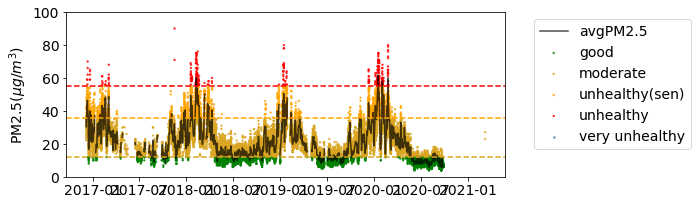

In [45]:
# looking at the raw data
ax = plot_all_pollutions(poll_df, city_name=city_name, filename=dataset.report_folder +'all_poll.png')
ax.set_ylim([0, 100])

PM2.5    152.666667
dtype: float64


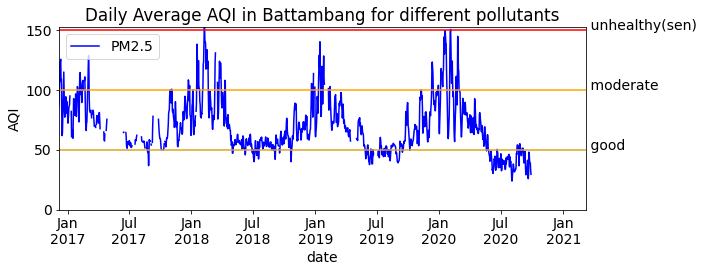

In [46]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

aqi 100 in  Dec-11 to Mar-18


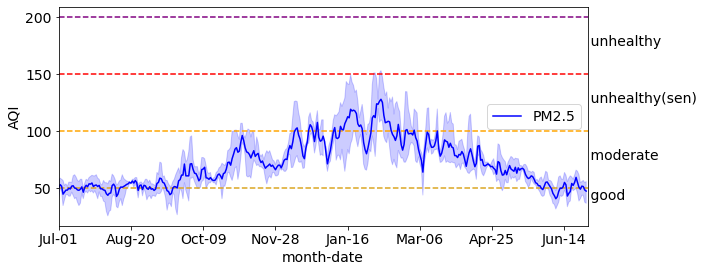

In [47]:
ax, winterday_dict = plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5')
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)

plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25_aqi.png')

In [48]:
winterday_dict

{'159': 'Dec-06',
 '160': 'Dec-07',
 '161': 'Dec-08',
 '162': 'Dec-09',
 '163': 'Dec-10',
 '164': 'Dec-11',
 '165': 'Dec-12',
 '166': 'Dec-13',
 '167': 'Dec-14',
 '168': 'Dec-15',
 '169': 'Dec-16',
 '170': 'Dec-17',
 '171': 'Dec-18',
 '172': 'Dec-19',
 '173': 'Dec-20',
 '174': 'Dec-21',
 '175': 'Dec-22',
 '176': 'Dec-23',
 '177': 'Dec-24',
 '178': 'Dec-25',
 '179': 'Dec-26',
 '180': 'Dec-27',
 '181': 'Dec-28',
 '182': 'Dec-29',
 '183': 'Dec-30',
 '184': 'Dec-31',
 '185': 'Jan-01',
 '186': 'Jan-02',
 '187': 'Jan-03',
 '188': 'Jan-04',
 '189': 'Jan-05',
 '190': 'Jan-06',
 '191': 'Jan-07',
 '192': 'Jan-08',
 '193': 'Jan-09',
 '194': 'Jan-10',
 '195': 'Jan-11',
 '196': 'Jan-12',
 '197': 'Jan-13',
 '198': 'Jan-14',
 '199': 'Jan-15',
 '200': 'Jan-16',
 '201': 'Jan-17',
 '202': 'Jan-18',
 '203': 'Jan-19',
 '204': 'Jan-20',
 '205': 'Jan-21',
 '206': 'Jan-22',
 '207': 'Jan-23',
 '208': 'Jan-24',
 '209': 'Jan-25',
 '210': 'Jan-26',
 '211': 'Jan-27',
 '212': 'Jan-28',
 '213': 'Jan-29',
 '214': 'J

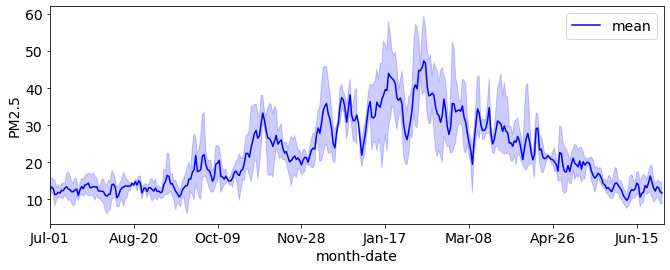

In [51]:
pollutant = 'PM2.5'
offset = 182
agg = 'max' # or 'mean'
roll = True 
# tag the season year 
df, winter_day_dict = season_avg(dataset.poll_df, cols=[pollutant], roll=roll, agg=agg, offset=offset)
df = add_season(df, start_month='-12-01', end_month='-03-30')


_, ax = plt.subplots(1,1, figsize=(11,4),sharex=True)

winter_day_dict, meandf = plot_season_avg(dataset.poll_df, 'PM2.5', ax, label='mean')


In [53]:
df.head(50)

,PM2.5,dayofyear,year,winter_day,month_day,season
datetime,,,,,,
2016-12-06,32.000000,341,2016,159,Dec-06,winter_2016
2016-12-07,36.208333,342,2016,160,Dec-07,winter_2016
2016-12-08,37.875000,343,2016,161,Dec-08,winter_2016
2016-12-09,42.625000,344,2016,162,Dec-09,winter_2016
2016-12-10,46.083333,345,2016,163,Dec-10,winter_2016
2016-12-11,46.458333,346,2016,164,Dec-11,winter_2016
2016-12-12,47.041667,347,2016,165,Dec-12,winter_2016
2016-12-13,40.875000,348,2016,166,Dec-13,winter_2016
2016-12-14,41.958333,349,2016,167,Dec-14,winter_2016


In [54]:
dataset.wea.head()

,datetime,Time,Temperature(C),Dew_Point(C),Humidity(%),Wind,Wind_Speed(kmph),Wind_Gust(kmph),Pressure(hPa),Precip.(mm),Condition
0,2016-01-01 00:00:00,12:00 AM,25.0,17.22,65.0,NNE,13.0,0.0,982.0,0.0,Partly Cloudy
1,2016-01-01 00:30:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
2,2016-01-01 01:00:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
3,2016-01-01 01:30:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
4,2016-01-01 02:00:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy


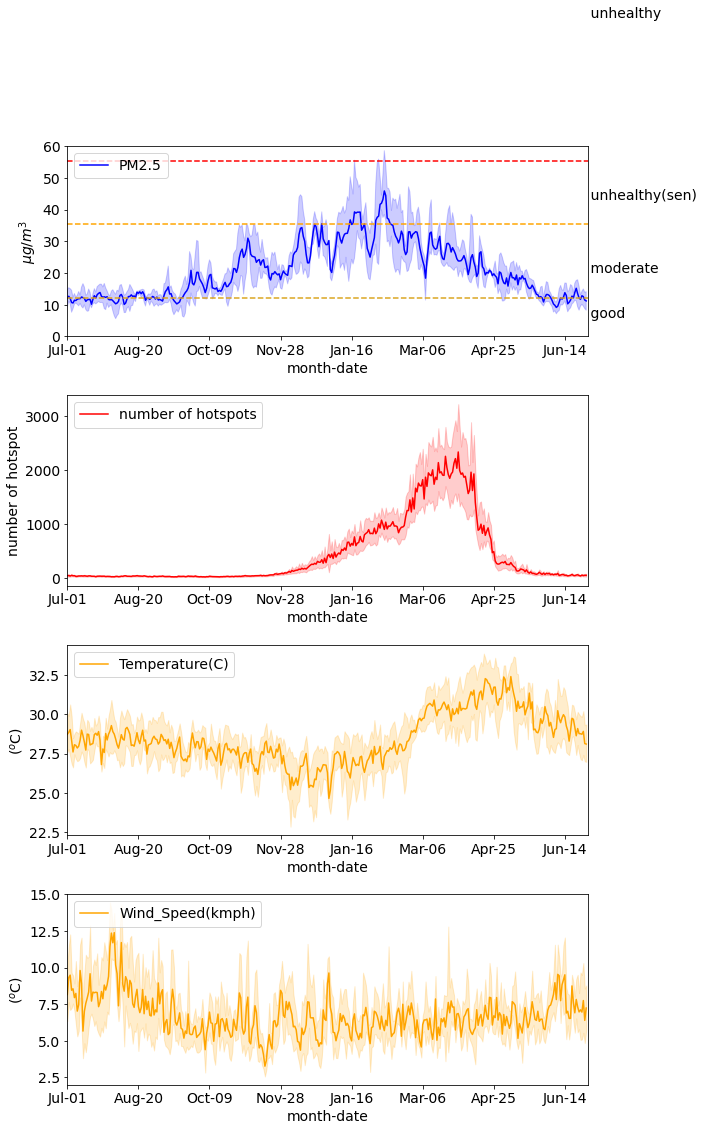

In [59]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0, 60])
ax[-1].set_ylim([2, 15])
for a in ax:
    new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    
    a.set_xticklabels(new_ticks)

#plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

In [61]:
dataset.fire.head()

,latitude,longitude,confidence,long_km,lat_km,distance,country,power,count,degree,spot_direct
datetime,,,,,,,,,,,
2002-07-04 13:01:00,9.7457,107.9835,67,12020.668234,1090.155871,654.811193,NaN,29.40,1,-36.0,E
2002-07-04 13:03:00,14.4216,102.8814,67,11452.705060,1622.630475,155.684083,Thailand,120.96,1,103.0,N
2002-07-04 13:04:00,19.8946,105.1144,52,11701.281483,2260.549021,817.848793,Vietnam,20.52,1,75.0,N
2002-07-04 13:04:00,20.3829,104.9449,48,11682.412829,2318.446282,869.460493,Vietnam,13.50,1,77.0,N
2002-07-04 13:04:00,20.3938,104.9437,91,11682.279246,2319.740760,870.692428,Vietnam,132.30,1,77.0,N


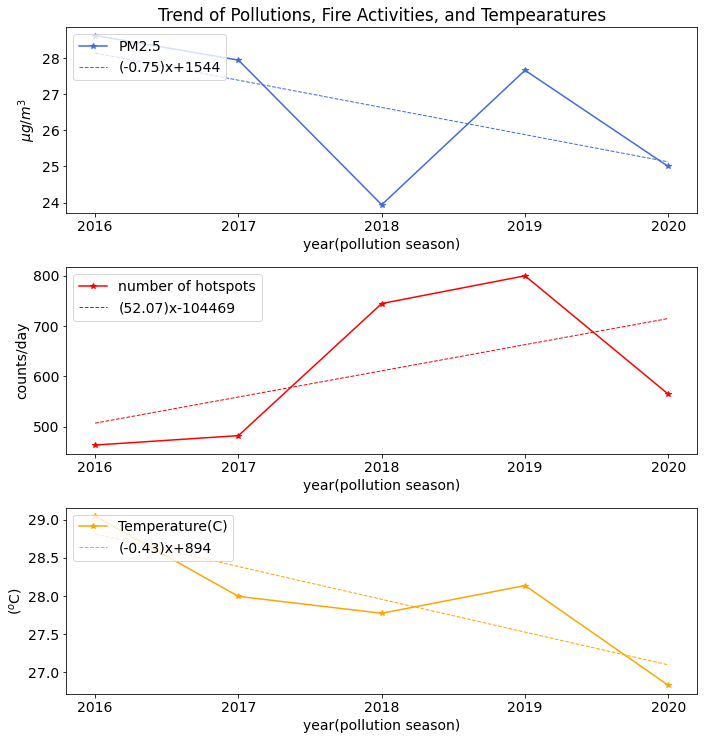

In [60]:
ax, year_avg, year_avg_std = plot_yearly_ln(dataset, min_year=2016, max_year=2021, err_bar=False)


# Model Training

In [94]:
dataset.load_()

In [95]:
dataset.wea.tail()

,Temperature(C),Humidity(%),Wind,Wind_Speed(kmph),Pressure(hPa),Precip.(mm),Condition
datetime,,,,,,,
2022-03-31 21:30:00,25.0,56.630952,E,10.0,982.0,0.0,Partly Cloudy
2022-03-31 22:00:00,24.0,56.630952,NE,72.0,982.0,0.0,Partly Cloudy / Windy
2022-03-31 22:30:00,24.0,56.630952,NE,16.0,982.0,0.0,Partly Cloudy
2022-03-31 23:00:00,24.0,56.630952,NE,10.0,982.0,0.0,Partly Cloudy
2022-03-31 23:30:00,24.0,56.630952,E,11.0,982.0,0.0,Partly Cloudy


In [96]:
dataset.feature_no_fire()

--------------- first index  2016-12-06 11:00:00


In [98]:
dataset.data_no_fire.head()

,PM2.5,Temperature(C),Humidity(%),Wind_Speed(kmph),wind_CALM,wind_E,wind_N,wind_S,wind_W,is_rain,is_holiday,is_weekend,day_of_week,time_of_day
datetime,,,,,,,,,,,,,,
2016-12-06 11:00:00,30.5,30.0,56.630952,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0
2016-12-06 12:00:00,30.5,30.0,56.630952,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
2016-12-06 13:00:00,30.1,30.0,56.630952,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0
2016-12-06 14:00:00,29.6,30.0,56.630952,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
2016-12-06 15:00:00,29.2,30.0,56.630952,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
